|--- | Revenir à la [page déroulement](../README.ipynb) | [Intro Octave 2](OCT2_intro.ipynb)|
|-------------|---|---|

---
# OCT1 Intro. : CORRIGÉ (-> [Sujet](./OCT1_intro.ipynb))
--- 
  

---

Concepts :
  - langage interprété (vs langage compilé)
  - polymorphisme des variables
  - aides et communauté
  - manipulation des vecteurs/matrices/tenseurs
  - boucles vs calcul vectorisé
  - Opérateur élément par élément

## Langage interprété
---
Différence entre octave et  ADA, un code source .adb et un script .m ...

Notion de kernel et machine virtuelle

<img src="../../continu/td/images/compile_vs_interprete.png" alt="drawing" width="400"/>

D'après vous lesquels sont compilés et lesquels interpértés ?
 - Ada
 - Matlab
 - python
 - Java
 - C

## Polymorphisme des variables
---

En interprété il n'est pas besoin de déclarer un type de variable. 

Le fait d'utiliser une variable la crée et son initialisation donne sont type !

Si l'utilisation change, le type change avec la notion de **promotion de type** : "qui peut le plus peut le moins"

Essayons de déclarer une variable A et voyons sont évolution...

In [1]:
A = 3
A = 3/4
A = sqrt(-A)
A = B


A =  3
A =  0.75000
A =  0.00000 + 0.86603i
error: 'B' undefined near line 1 column 5


Et oui $\mathbb{Z}\subset\mathbb{R}\subset\mathbb{C}$ donc la promotion marche

> Même s'il n'est pas utile de déclarer explicitement le type, il faut au moins créer la variable B en l'initialisant avant de l'utiliser.

L'interpréteur garde en mémoire toutes ces variables dans un *memory pool* appelé *workspace*. Ce worwspace est visible d'ans l'IDE d'octave (à droite, ou le type la dimension et la valeur sont affichés)


Mais une variable peut non seulement se promouvoir de type mais aussi en dimention et passer de scalaire à vecteur à matrice à matrice de dimensions supérerieure (hyper matrice ou tenseur).

La syntexe est celle de l'ADA **sans déclaration!** il suffit de voir une matrice comme un tableau à deux entrées avec la notation `A(2,3)` pour l'élément de rangée 2 et la colonne 3 du tableau A.

Voici donc une promotion de dimention

In [2]:
A(2,3) = exp(i*pi/2)
A(1,1,2) = sqrt(2) * exp(i*pi/4)

A =

   0.00000 + 0.86603i   0.00000 + 0.00000i   0.00000 + 0.00000i
   0.00000 + 0.00000i   0.00000 + 0.00000i   0.00000 + 1.00000i

A =

ans(:,:,1) =

   0.00000 + 0.86603i   0.00000 + 0.00000i   0.00000 + 0.00000i
   0.00000 + 0.00000i   0.00000 + 0.00000i   0.00000 + 1.00000i

ans(:,:,2) =

   1.00000 + 1.00000i   0.00000 + 0.00000i   0.00000 + 0.00000i
   0.00000 + 0.00000i   0.00000 + 0.00000i   0.00000 + 0.00000i



Remarquez que matlab connais les opérateurs de base et plus et le nombre imaginaire `i` mais aussi noté  `j`.
Attention au polymorphisme ! on peut redéclarer cette variable prédéfinie !

In [3]:
i = "Toto"
j
i(3)
i(4)


i = Toto
ans =  0 + 1i
ans = t
ans = o


Regardons dans le workspace (sur l'IDE) ce qu'il y a comme variable, et essayons d'effacer certaines

In [4]:
who
clear i
i
who
clear all
disp("Le dernier who n'affiche rien")
who 


Variables in the current scope:

A    ans  i

ans =  0 + 1i
Variables in the current scope:

A    ans

Le dernier who n'affiche rien


## Exercice
Votre corrigé du test sur polymorphisme, casting, promotion...

Essayez de créer par promotions successives (par ex. $B=\dots$, puis $B(1,2)=\dots$ etc.) :
 - le vecteur ligne $u = [0, 1, 2]$
 - le vecteur colone $v =  \left[\begin{matrix}0 \\ 1 \\2\end{matrix}\right]$
 - la matrice $B = \left[\begin{matrix}1 & 0\\2 & 0 \\ 3 & 2+i\end{matrix}\right]$ 
 
 **N'utilisez pas encore les fonctions `1:3`, et `(1:3)'` ou `linspace`**

In [5]:
%% VOTRE CODE ICI !
clear all
%% démarrer directement avec

% Tableau 1D sont des matrices lignes (1,n) par défaut
u=0 ;  % ou u(1)=0
u(2)=1;
u(3)=2
% On peut de manière équivalente utiliser les tableaux 2D
u=0 ; u(1,2)=1 ; u(1,3)=2  

% Tableau 2D obligatoires pour les vecteurs colonnes (n,1)
v=0 ; v(2,1)=1 ; v(3,1)=3

%Tableau 2D pour les matrices (n,m) évidemment
B=1 ; B(1,2)=1 ; B(2,1)=2 ; B(3,1)=3 ; B(3,2) = 2+i

% Exécutez avec MAJ+ENTREE


u =

   0   1   2

u =

   0   1   2

v =

   0
   1
   3

B =

   1 + 0i   1 + 0i
   2 + 0i   0 + 0i
   3 + 0i   2 + 1i



## Aide et communauté
---

La fonction`help` permet d'obtenir des information bien faites sur une commande et de trouver des commandes annexes.

Cherchons si la fonction `log` est en base 10, 2 ou e.

In [6]:
help log

'log' is a built-in function from the file libinterp/corefcn/mappers.cc

 -- log (X)
     Compute the natural logarithm, 'ln (X)', for each element of X.

     To compute the matrix logarithm, see *note Linear Algebra::.

     See also: exp, log1p, log2, log10, logspace.

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


C'est donc le $ln$ néperien et celui en base 10 est sans doute $log10$.

De plus il existe une autocomplétion : si on tape un début "sin" de "sinus cardinal" par exemple, et que l'on appuie sur TAB, octave va proposer ce qui existe pour compléter.

Utilisez l'autocomplétion TAB puis la commande `help` pour savoir si le sinus cardinal de matlab est défini par $\frac{\sin(x)}{x}$ ou bien $\frac{\sin(\pi.x)}{\pi.x}$...

In [7]:
## VOTRE AUTOCOMPLETION POUR TROUVER la def de sinus cardinal

sinc(0)
disp("Alors que le calcul") 
-1/0
sin(0)/0

ans =  1
Alors que le calcul
ans = -Inf
ans = NaN


Octave nous préviens d'une division par 0 qui n'est pas une erreur !   
La valeur produite est "Not A Number" dans se cas car forme indéterminée 0/0.

1/0 vaut "+Inf" en octave

La fonction "Sinus cardinal" est non-définie en 0 mais usuellement prolongée de manière continue en 0 par un 1.

Car par équivalence $\frac{\sin(x)}{x} \underset{x\to 0}{\sim} \frac{x}{x} = 1 \neq 0$

> Une recherche sur internet sera très efficace car la communauté Matlab et Octave est très grande : il y a un code .m pour tout !

## Manipulation des vecteur/matrice/tenseurs
---

Plusieur outils et écritures pour manipuler vecteur et matrices sont natif en Octave.

De manière native une matrice de dimention 2 peut se déclarer avec :
 - d'abord `,` le séparateur de colonnes
 - puis `;` le séparateur de lignes   

Par exemple pour l'exercice précédent

In [8]:
u = [0, 1, 2]
v = [0; 1; 2]
B = [ 1, 0;
      2, 0;
      3, 2+i]

u =

   0   1   2

v =

   0
   1
   2

B =

   1 + 0i   0 + 0i
   2 + 0i   0 + 0i
   3 + 0i   2 + 1i



Pour créer des matrices spéciales de zeros, de 1, ou une suite de nombres

In [9]:
clear all;
z=zeros(2,1) % 2 rangées et 1 colonne  de zéros
u=ones(1,2)  % 1 rangée  et 2 colonnes de uns
r=rand(2,3)  % 2 rangées et 3 colonnes de variable aléatoire gaussiènes

t=linspace(1,2,6) % en colonne, de 1 à 2 avec 6 points
disp("L'intervale est donc de (2-1)/(6-1)="); (2-1)/(6-1)

% de manière équivalente
tt=1:0.2:2.1        % de 1 à 2.1 par pas de 0.2


z =

   0
   0

u =

   1   1

r =

   0.94807   0.24427   0.61195
   0.28049   0.24899   0.31524

t =

   1.0000   1.2000   1.4000   1.6000   1.8000   2.0000

L'intervale est donc de (2-1)/(6-1)=
ans =  0.20000
tt =

    1.0000    1.2000    1.4000    1.6000    1.8000    2.0000



Les produits matriciel, scalaires existent nativement et sont les opérateurs `*`,`+`
L'opérateur transpose existe aussi 'transpose' ainsi que la transposée hilbertienne `'` (transpose et conjugué complexe)

Cela donne...

In [10]:
u_fois_u = u*z  % produit scalaire (1,2)x(2,1)=(1,1) ou "dot product" 
z_fois_u =z*u   % matriciel (2,1)x(1,2)= (2,2) 
transpose_i_u = transpose(u*i)
hilbert_i_u = (u*i)'
longueur = length(t)
taille = size(t)


u_fois_u = 0
z_fois_u =

   0   0
   0   0

transpose_i_u =

   0 + 1i
   0 + 1i

hilbert_i_u =

   0 - 1i
   0 - 1i

longueur =  6
taille =

   1   6



## Exercice matrices

  - Créez le vecteur temps `t` ligne qui va de -5 à 5 par pas de 0.5. En utilisant la notation `deb:step:fin`
  - Utiliser la fonction `length` et `ones` pour créer un vecteur **colone** nommé `u` de uns de même longueur que `t`
  - Réfléchissez s'il faut faire `t*u`ou `u*t` pour obtenir un résultat scalaire. 
  - Ce résultat doit correspondre à la somme des valeurs de t mais réalisée par projection scalaire avec u. Comparez avec la fonction `sum(t)` qui doit donner cette même somme qui vaut 0
  

In [1]:
% VOTRE CODE
t=-5:0.5:5 % à vous de modifier
N = length(t)
u = ones(N,1)
somme_matricielle = t*u        % ligne (1,N) x (N,1) en colonne = (1,1) scalaire 
somme_sum =sum(t)

t =

 Columns 1 through 8:

   -5.0000   -4.5000   -4.0000   -3.5000   -3.0000   -2.5000   -2.0000   -1.5000

 Columns 9 through 16:

   -1.0000   -0.5000    0.0000    0.5000    1.0000    1.5000    2.0000    2.5000

 Columns 17 through 21:

    3.0000    3.5000    4.0000    4.5000    5.0000

N =  21
u =

   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1

somme_matricielle = 0
somme_sum = 0


## Boucles vs calcul vectorisé
---

Les opérateurs matriciels étant natifs, les fonctions peuvent s'appliquer autant à des matrices qu'à des scalaires.   
Inutile de balayer un tableau 1D avec une boucle...

Nous allons représenter le signal $s: t\mapsto \sin(2\pi.t)$ en évaluant cette fonction pour tous les instants $t$ contenus dans le tableau `tt` et en mémorisant ses valeurs $s(t)$  dans un tableau `s_de_t`.

### Boucle For (Obsolète en octave)
Une première solution est de faire une boucle `for` comme en ADA. Mais elle n'utilise pas le langage et le dénature...

In [18]:
for id = 1:6
    t = tt(id); % ; pour ne pas afficher
    s_de_t(id)=sin(2*pi*t);
end
s_de_t % sans ; pour afficher

s_de_t =

  -2.4493e-16   9.5106e-01   5.8779e-01  -5.8779e-01  -9.5106e-01  -4.8986e-16



La représentation numérique en notation scientifique n'est pas très visuelle ! On va utiliser un affichage avec `plot`

Le premier vecteur est la valeur des abscices et le second **de même taille** les ordonnées de chaque point.

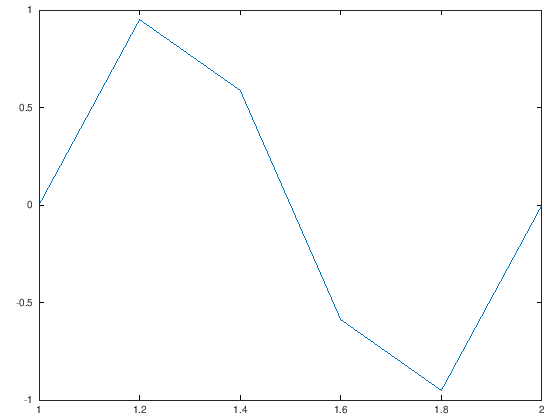

In [19]:
plot(tt,s_de_t)

**Exercice** 
Augmentez le nombre de points en faisant passer la **période d'échantillonnage $T_e$** (l'écaart régulier entre deux valeurs du temps dans la représentation : qui est ici de 0.2 s) à une valeur de $0.1$.

Vous utiliserez la fonction `length` pour connaitre le nombre de points de `tt` et modifier votre boucle.

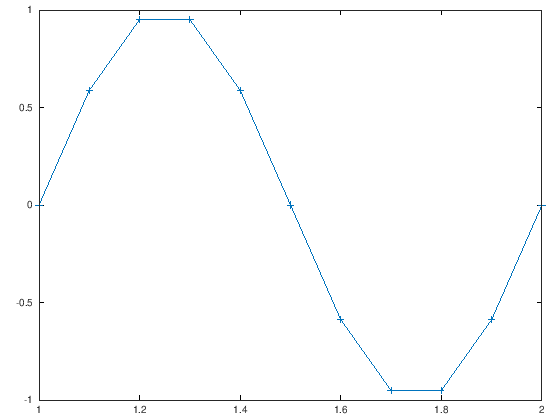

In [20]:
Te=0.1;
%% MODIFER pour redéfinir le vecteur temps tt de 1 à 2 par pas de Te=0.1
tt=1:Te:2;

%% ADAPTER la boucle avec la fonction length
for id = 1:length(tt)
    t = tt(id); % ; pour ne pas afficher
    s_de_t(id)=sin(2*pi*t);
end

plot(x=tt, y=s_de_t, fmt='-+') ; %% style avec des + reliés par une ligne

### Vectorisation
 Octave sait multiplier une matrice par un scalaire et sait appliquer la fonction `sin`à une matrice pour donner une matrice de même da taille contenant l'évaluation de $\sin$ pour chaque élément...
 L'utilisation dans notre cas immédiate !
 
Reprenons le vecteur temps de 6 points et testons nos calculs matriciels

In [21]:
tt= 1:0.2:2;
2*pi*tt
sin(2*pi*tt)

ans =

     6.2832     7.5398     8.7965    10.0531    11.3097    12.5664

ans =

  -2.4493e-16   9.5106e-01   5.8779e-01  -5.8779e-01  -9.5106e-01  -4.8986e-16



La ligne `sin(2*pi*tt)` effectue implicitement une boucle for dans tous les éléments de l'arguments `2*pi*tt` qui est un vecteur et prduit un vecteur de même taille de tous les résultats.

Vous pouvez donc refaire l'exercice mais sans boucle for **en une seule ligne !**

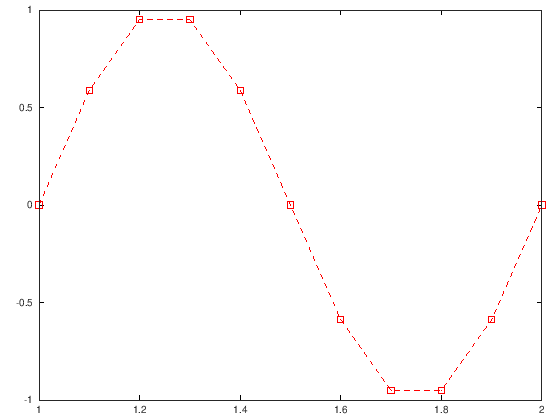

In [23]:
tt=1:Te:2;

% MODIFIEZ cette ligne pour calculer s_de_t
s_de_t = sin(2*pi*tt);

plot(tt, s_de_t , "rs--") %Read Squares reliés par des tirets

#### Vectorisation des opérateurs de comparaison
Les opérateurs de comparaison sont vectorisés et donnent des vecteur de booléens.

Ces vecteurs de booléens sont promus au rang de nombres avec '1' pour vrai ai '0' sinon.
Cela est très pratique pour construire des fonctions par morceaux sans faire de *if* dans un *for*. 
 
Faisons le vecteur de la fonction $u(\bullet-2)$ à l'ancienne

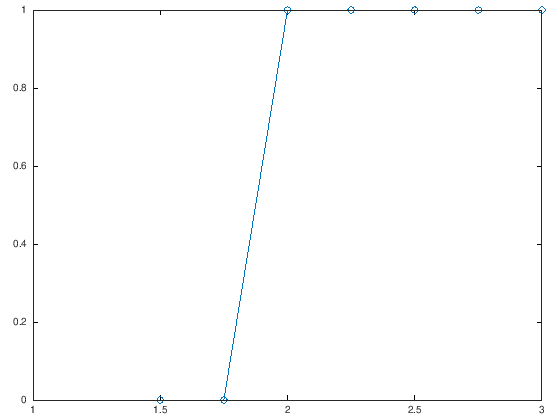

In [24]:
clear s_de_t

tt=1.5:0.25:3 ;

for id=1:length(tt)
    t = tt(id);
    if (t<2) 
        s_de_t(id) = 0;
    else
        s_de_t(id) = 1;
    end
end
plot(tt,s_de_t,'o-')

Mais si l'on utilise la vectorisation de la condition $t<2$, sur le tableau des valeurs de t nommé `tt`, on obtient un vecteur des comparaisons avec des 1 et des 0 !
Ce qui est facile à manipluler...

On a ainsi les fonctions échelons, portes, et *pseudo_dirac* (impulsion unité)

In [25]:
tt
tt < 2
tt >= 2
not(tt<2)
tt == 2
(tt<=2) & (tt>=2)  % & est le ET par éléments alors que && est le logique à la ADA
(tt<=1.75) | (tt>=2.5) % | le OU elementwise et || le OU logique (pour les if ou while style ADA)

tt =

    1.5000    1.7500    2.0000    2.2500    2.5000    2.7500    3.0000

ans =

  1  1  0  0  0  0  0

ans =

  0  0  1  1  1  1  1

ans =

  0  0  1  1  1  1  1

ans =

  0  0  1  0  0  0  0

ans =

  0  0  1  0  0  0  0

ans =

  1  1  0  0  1  1  1



## Exercice vectorisation   

Utilisez les opérateurs par éléments que sont le `+-` matriciels et le `+-*\` entre vecteur **et scalaire**
pour fabriquer les tableau de valeurs `g_de_t` de la fonction :   
$g: t \mapsto u(t)+u(t-1)+u(t-2)-3.u(t-3))$ ou de manière plus lisible   
$g = u(\bullet)+u(\bullet-1)+u(\bullet-2)-3.u(\bullet-3)$

Où $u$ est la fonction de heaviside (0 quand t<0, et 1 sinon) que vous fabriquerez par vectorisation de l'opérateur `>`

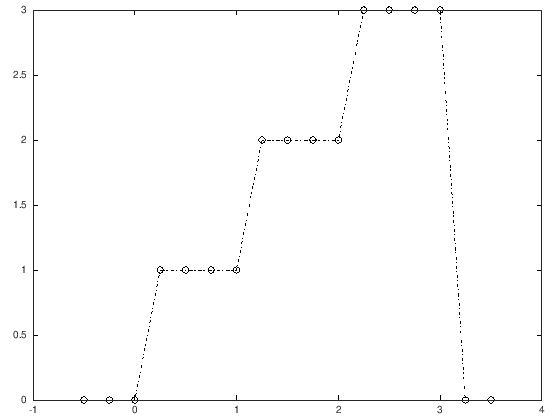

In [6]:
%% MODIFIEZ tt= 
% pour avoir un vecteur temps tt entre -0.5 et 3.5 par pas de 0.25
tt=-0.5:0.25:3.5;

%% MODIFIEZ g_de_t=
g_de_t = (tt>0)+(tt>1)+(tt>2)-3*(tt>3) ;

%%AFFICHAGE
plot(tt, g_de_t, 'ko-.'); % blacK cicrcle "o" avec trait discontinus "-."

## Opérations éléments par éléments
---

Les opérateurs *in fixés* de base comme `*/^` sont des opérateurs matriciels (le `/` existe en matriciel et consiste à résoudre un système, il se note à l'envers `\` ).

Pour faire du calcul vectorisé **élément par élément** (*elementwise*), on met un `.` en préfixe de l'opérateur soit `.* ./ .^`.

> Cela permet de multiplier des signaux (ou plutôt leur tableaux de valeurs) entre-eux.

### Produits de signaux
Si l'on veut multiplier le signal $g : t\mapsto e^{-t}$ par le signal échelon $u$.   
On est tenté de faire cela pour afficher $f=g.u$

In [27]:
tt=-1:0.5:3;   % tt pour "Table de T"

g_de_t = exp(-tt); % Par vectorisation de la fonction matlab exp()
u_de_t = tt>=0 ;    % 
f_de_t = g_de_t*u_de_t

error: operator *: nonconformant arguments (op1 is 1x9, op2 is 1x9)


Et oui ! Matlab utilise le produit matriciel et un produit (1,n)x(1,n) ne respecte pas la relation de Chasles car $,n\neq1,$

> Il faut alors demander la version "élément par élément" du produit avec `.*` ce qui donne

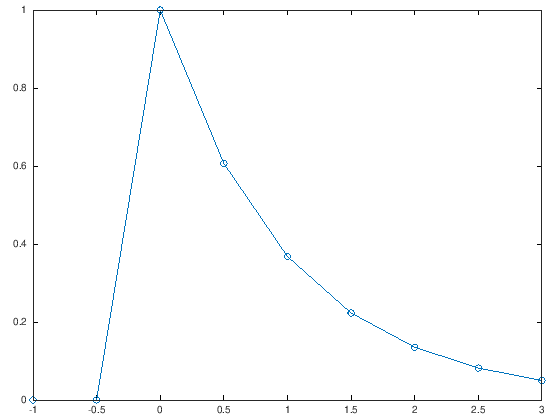

In [28]:
f_de_t = g_de_t .* u_de_t ;
plot(tt, f_de_t,'o-')

## Exercice produits signaux

Attention à la taille des matrices sur des produits éléments par éléments~:
> il faut **la même taille** comme plour les plots d'ailleurs.

A vous de le faire fonctionner en surveillant les tailles et en utilisant les produits par éléments `.*` au bon moment.

On veut que `f_de_t` soit la fonction $t\mapsto u(t).g(t)+ 2.u(t)$

taille_u =

    1   37

taille_g =

    1   37

taille_f =

    1   37



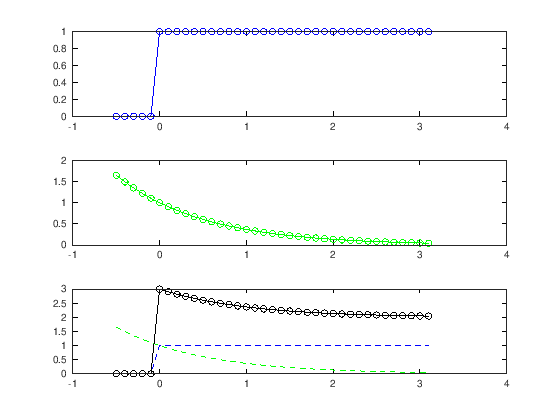

In [1]:
tt=-1:0.5:3;   % tt pour "Table de T"

g_de_t = exp(-tt); % Par vectorisation de la fonction matlab exp()
u_de_t = (tt >= 0) ; %  vectorisation de supérieur ou égal >=

tt=-0.5:0.1:3.1; % raffinement de tt
%% MODIFIER POUR QUE CA MARCHE
u_de_t = (tt >= 0) ; 
g_de_t = exp(-tt);  % Il faut aussi réévaluer g_de_t pour 
                    % pour avoir le même nombre de valeurs
taille_u=size(u_de_t)
taille_g=size(g_de_t)
f_de_t = u_de_t .* g_de_t + 2 * u_de_t ;
%                |        |   |
%                P1       S   P2
% Le produit P1 est (1,37) x (1,37) -> (1,37)
%    n'est pas matriciel : il faut demander par élément avec .*
% La somme S est (1,37) + (1,37) -> (1,37) matricielle
%  c'est d'ailleur une somme élément par éléments + <-> .+
% Le produit P2 est (1,1) x (1,37) -> (1,37) matriciel
% pas besoin de demander un produit par élément ce sera fait...

taille_f=size(f_de_t)


%% subplot permet de diviser une figure en plusieurs graphiques
subplot(3,1,1) % 3 rangees de graphiques et 1 colonne : on se met dans le premier
plot(tt,u_de_t,'ob-')
subplot(3,1,2) % 3 rangees de graphique et 1 colonne : on se met dans le deuxième
%plot(tt,exp(-tt),'o-')

plot(tt,g_de_t,'og-')
subplot(313) % on se met dans le troisième graphique

plot(tt,u_de_t,'b--'); hold on ; % superpose des graphiques
plot(tt,g_de_t,'g--');
plot(tt,f_de_t,'ko-'); 


**BONUS matrices** : Prenons le cas de produits matriciels définis et non définis.

In [30]:
A = [1,1,0;
     0,1,1;
     0,0,2]
B = (1:3)
disp("B*A OK car (1,3)x(3,3)")
B*A
disp("A*B=erreur car (3,3)x(1,3)")
A*B
A_carre = A^2
disp("B/A existe ! ")
x = B/A
disp ("Tel que x*A = B")
x*A

A =

   1   1   0
   0   1   1
   0   0   2

B =

   1   2   3

B*A OK car (1,3)x(3,3)
ans =

   1   3   8

A*B=erreur car (3,3)x(1,3)
error: operator *: nonconformant arguments (op1 is 3x3, op2 is 1x3)
A_carre =

   1   2   1
   0   1   3
   0   0   4

B/A existe ! 
x =

   1   1   1

Tel que x*A = B
ans =

   1   2   3



Pour `A/B`, matlab fait appel à un solveur numérique pour trouver le vecteur  
$x \quad | \quad x.A = B \iff \frac{B}{A}.A= B$ par la  gauche (combi. de rangées)

$x$ est donc **une combinsaion de rangées** de A qui donne le vecteur rangée B.


Avec `A\C`, c'est le produit à droite qui est inversé tel que :
$y \quad | \quad A.y = C \iff A.\frac{C}{A}= C$ par la droite (combi. de colonnes)

$y$ est donc **une combinsaion de colonnes** de A qui donne le vecteur colonne C.

---
# Exercice final  (une solution)
---

Vous pouvez maintenant faire l'exercice final qui consiste à afficher sur le même graphique deux signaux :
 - $f_1 : t \mapsto 2.\cos\left(\frac{2\pi}{10}.t\right)$
 - $f_2 : t \mapsto 2.\cos\left(\frac{2\pi}{10}.t\right).\sin\left(\frac{2\pi}{10}.t\right)$

En affichant pour un temps allant de -5 à 5 avec une période d'échantillonnage de 0.5.

Modifiez la cellule ci-dessous ou faites-le avec l'IDE d'octave (CTRL+ALT+T pour lancer un terminal puis `octave  --gui`)



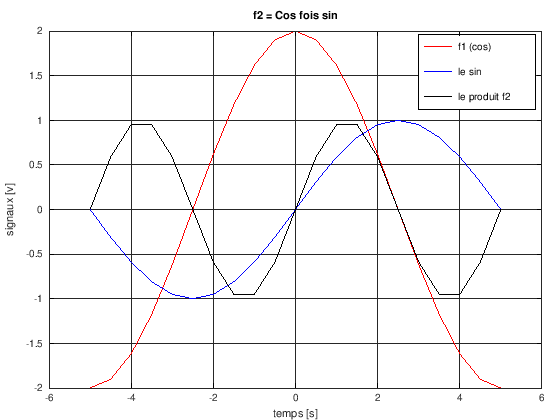

In [31]:
%% Une solution de l'intro octave 1 
% Affiche les deux fonctions f1 et f_2 du sujet
% https://moodle.insa-toulouse.fr/pluginfile.php/33895/mod_resource/content/5/TD_prise_en_main_Matlab_Octave_signal_2IMACS.pdf
%%___________________________________________________________

%% Fait le ménage
clear all % les variables
close all % ferme les fenêtres
clc       % efface la console (fenêtre de commandes)

%%________________________________________
%% définition de paramètres et constantes
% Utilisatrice : modifiez le code ci-dessous 

Te = 0.5; % période d'échantillonnage [s]
tmin=-5; 
tmax=5;


A = 2;  % amplitude du signal [V]
F = 1/10; % fréquence du signal cos [Hz] de f1 (voir sujet)
Fsin = F ; % fréquence du sin f2 (voir sujet)

% Ne plus modifier le code au delà de cette ligne
%%_______________________________________

t=tmin:Te:tmax ; % vecteur temps 
f1_de_t =  A * cos(2*pi*F*t); % vectorisation sur t !
sin_de_t = sin(2*pi*Fsin*t); % vectorisation sur t
f2_de_t = f1_de_t .* sin_de_t; % produit de signaux
%                  ^
%                  |___ produit élément par élément ici 


%% Affichage
plot(t, f1_de_t,'r');     % trait rouge
hold on;               % ne pas effacer le graphique précédent pour supperposer
plot(t, sin_de_t, 'b'); % que des points verts
plot(t, f2_de_t, 'k'); % que des points verts
grid on;
xlabel("temps [s]");
ylabel("signaux [v]");
legend(["f1 (cos)"; "le sin";"le produit f2"])
title("f2 = Cos fois sin")


Une solution avec des bouclette for obsolètes...

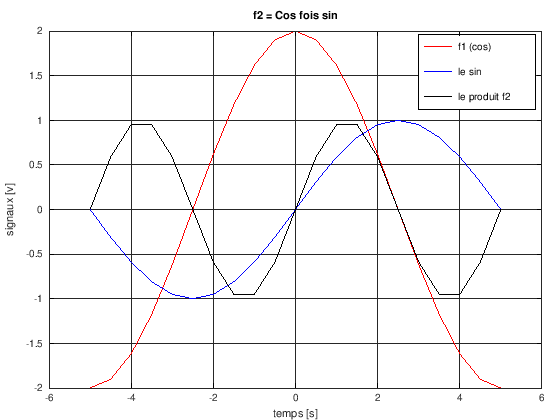

In [37]:
%% Une solution de l'intro octave 1 
% Affiche les deux fonctions f1 et f_2 du sujet
% https://moodle.insa-toulouse.fr/pluginfile.php/33895/mod_resource/content/5/TD_prise_en_main_Matlab_Octave_signal_2IMACS.pdf
%%___________________________________________________________

%% Fait le ménage
clear all % les variables
close all % ferme les fenêtres
clc       % efface la console (fenêtre de commandes)

%%________________________________________
%% définition de paramètres et constantes
% Utilisatrice : modifiez le code ci-dessous 

Te = 0.5; % période d'échantillonnage [s]
tmin=-5; 
tmax=5;


A = 2;  % amplitude du signal [V]
F = 1/10; % fréquence du signal cos [Hz] de f1 (voir sujet)
Fsin = F ; % fréquence du sin f2 (voir sujet)

% Ne plus modifier le code au delà de cette ligne
%%_______________________________________

% N=nombre de points espacés de Te entre tmin et tmax
N= round((tmax-tmin)/(Te))+1; % floor(x) = entier le plus proche de x

%calcul du tableau  tt
tt=zeros(1,N); % init à 0 
t=tmin;
for id=1:N
    tt(id)=t;
    t=t+Te;
end

% calcul des signaux 
for id=1:N
    t=tt(id); % instant t lu dans le tableau tt
    f1_de_t(id) =  A * cos(2*pi*F*t); % vectorisation sur t !
    sin_de_t(id) = sin(2*pi*Fsin*t); % vectorisation sur t
    f2_de_t(id) = f1_de_t(id) * sin_de_t(id); % produit de signaux
%                             ^
%                             |___ produit classique ici 
end

%% Affichage
plot(tt, f1_de_t,'r');     % trait rouge
hold on;               % ne pas effacer le graphique précédent pour supperposer
plot(tt, sin_de_t, 'b'); % que des points verts
plot(tt, f2_de_t, 'k'); % que des points verts
grid on;
xlabel("temps [s]");
ylabel("signaux [v]");
legend(["f1 (cos)"; "le sin";"le produit f2"])
title("f2 = Cos fois sin")
